In [1]:
import tensorflow.keras as keras
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from preprocessing import stretch_interpolate

plt.rcParams["figure.figsize"] = (15, 8)
plt.rcParams["font.size"] = 12

In [2]:
data_path = "./data/concatenated"
X, y = np.load(f"{data_path}/X.npy", allow_pickle=True), np.load(f"{data_path}//y.npy")

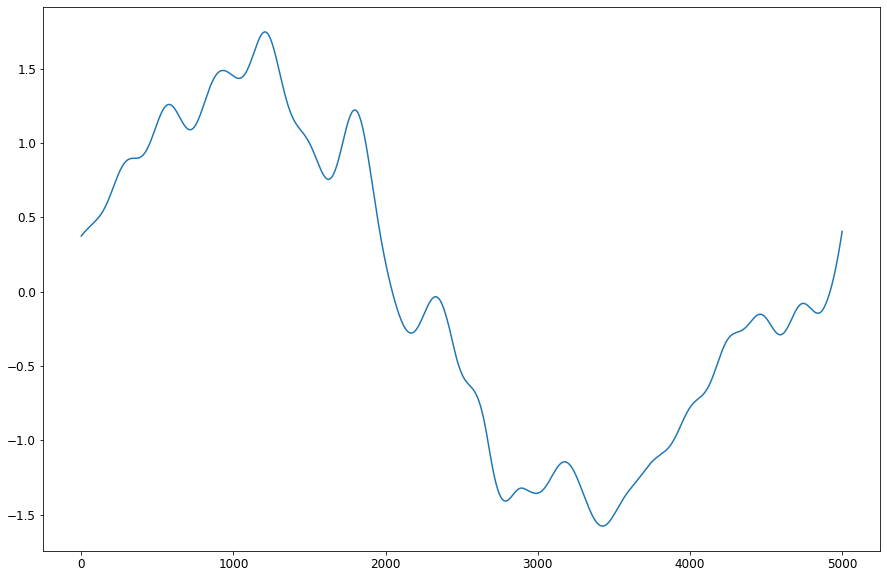

In [3]:
i = 52159  # np.random.randint(len(X)) #50590
X_selected = stretch_interpolate(X[i].ravel(), target_length=5000).reshape(1, -1)
plt.plot(X_selected.ravel())

In [4]:
def to_plt_color(arr):
    rescaled = MinMaxScaler().fit_transform(arr.reshape(-1, 1))
    return plt.cm.coolwarm(rescaled.reshape(-1))

In [5]:
def make_kernel(array):
    array = np.array(array)
    array = (array - np.mean(array)) / np.std(array)
    return lambda shape, dtype: tf.convert_to_tensor(array.reshape(shape), dtype=dtype)

# Kernel 1 - derivative kernel

In [6]:
kernel = stretch_interpolate(np.array([-1, 0, 1]), X_selected.ravel().shape[0] // 20)

In [7]:
input_layer = keras.layers.Input((None, 1))

output_layer = keras.layers.Conv1D(
    filters=1,
    kernel_size=len(kernel),
    padding="valid",
    use_bias=False,
    kernel_initializer=make_kernel(kernel),
)(input_layer)

model = keras.models.Model(inputs=input_layer, outputs=output_layer)

In [8]:
output = model.predict(X_selected)

1/1 [==============================] - 0s 195ms/step


In [9]:
kernel_size = len(kernel)
X_plot = X_selected.ravel()[kernel_size // 2 : -(kernel_size) // 2 + 1]

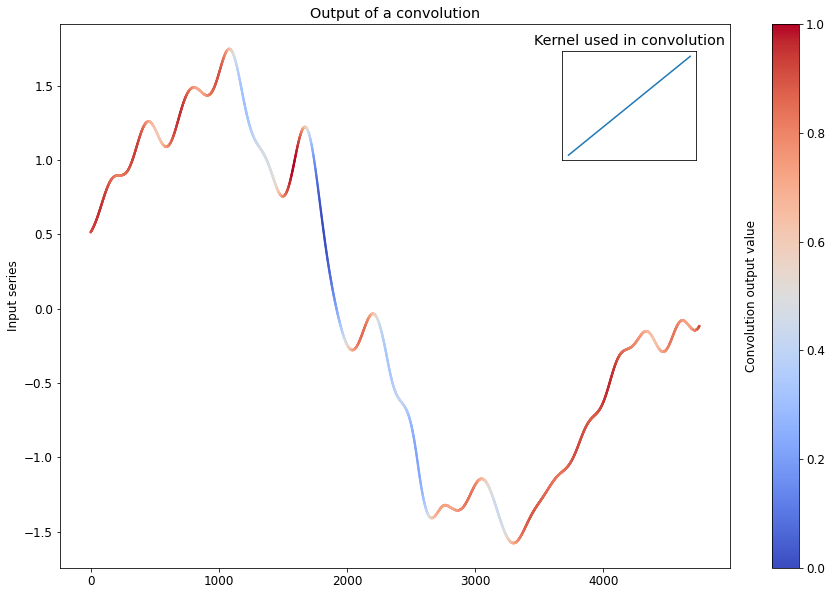

In [10]:
fig, ax1 = plt.subplots()
ax2 = ax1.inset_axes([0.75, 0.75, 0.2, 0.2])
ax1.scatter(np.arange(len(X_plot)), X_plot, c=to_plt_color(output), marker=".", s=7)
ax2.plot(kernel)
ax2.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm))
cbar.set_label("Convolution output value", labelpad=-80)
ax1.set_ylabel("Input series")
ax1.set_title("Output of a convolution")
ax2.set_title("Kernel used in convolution")
plt.savefig("../latex/2. thesis/imgs/convolution_output_growth.png", dpi=500)
plt.show()

# Kernel 2 - edge kernel

In [11]:
kernel = stretch_interpolate(np.array([-1, 0, -1]), X_selected.ravel().shape[0] // 20)

In [12]:
input_layer = keras.layers.Input((None, 1))

output_layer = keras.layers.Conv1D(
    filters=1,
    kernel_size=len(kernel),
    padding="valid",
    use_bias=False,
    kernel_initializer=make_kernel(kernel),
)(input_layer)

model = keras.models.Model(inputs=input_layer, outputs=output_layer)

In [13]:
output = model.predict(X_selected)

1/1 [==============================] - 0s 124ms/step


In [14]:
kernel_size = len(kernel)
X_plot = X_selected.ravel()[kernel_size // 2 : -(kernel_size) // 2 + 1]

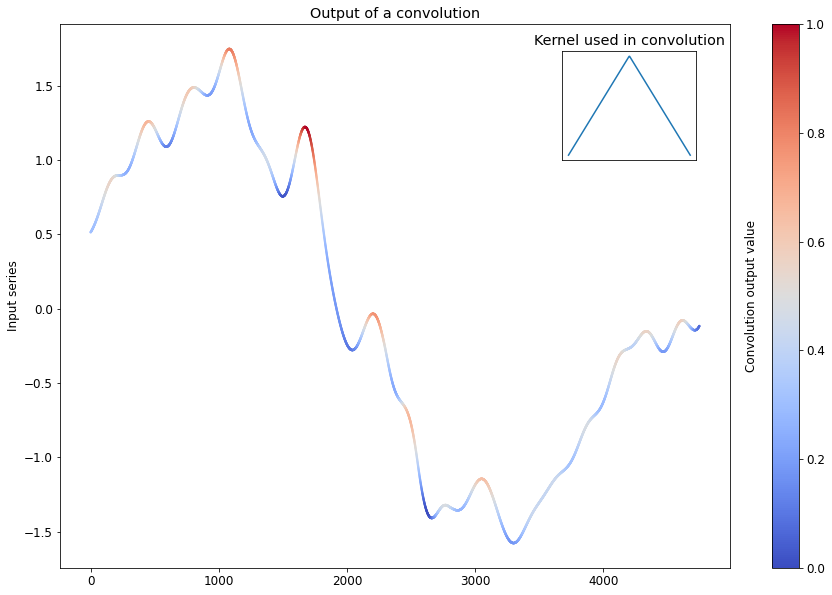

In [15]:
fig, ax1 = plt.subplots()
ax2 = ax1.inset_axes([0.75, 0.75, 0.2, 0.2])
ax1.scatter(np.arange(len(X_plot)), X_plot, c=to_plt_color(output), marker=".", s=7)
ax2.plot(kernel)
ax2.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm))
cbar.set_label("Convolution output value", labelpad=-80)
ax1.set_ylabel("Input series")
ax1.set_title("Output of a convolution")
ax2.set_title("Kernel used in convolution")
plt.savefig("../latex/2. thesis/imgs/convolution_output_hills.png", dpi=500)
plt.show()